#### Importing libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sympy import *
from sympy.solvers.solveset import linsolve

#### Defining required variables & calc eqns


$$ d_\mathrm{na} = \frac{\sum y dA}{\sum dA}$$\
$$ A = \sum dA$$\
$$ I = \sum y^2 dA$$

In [32]:
import sympy as sp

# Define the symbols
w_f, t_f, w_w, t_w, x,y, L, p_max, p2, E = sp.symbols('w_f t_f w_w t_w x y L p_max p2 E ')  # Flange width, flange thickness, web width, web thickness
C1,C2,C3,C4 = symbols('C1 C2 C3 C4')

# Area of the cross section for an I-beam
A_I = 2 * w_f * t_f + w_w * t_w

# Calculate the location of the neutral axis (d_na)
d_na_I = ((w_f * t_f) * (t_f / 2) + (w_w * t_w) * (t_f + w_w / 2)) / A_I

# Calculate the second moment of area (I) about the neutral axis
I_I = (2 * (w_f * t_f**3) / 12) + (w_f * t_f * (t_f / 2 - d_na_I)**2) + \
    (w_w * t_w**3 / 12) + (w_w * t_w * (d_na_I - w_w / 2)**2)

# Display the expressions
display('d_na=')
display(d_na_I)
display('A=')
display(A_I)
display('I=')
display(I_I)

'd_na='

(t_f**2*w_f/2 + t_w*w_w*(t_f + w_w/2))/(2*t_f*w_f + t_w*w_w)

'A='

2*t_f*w_f + t_w*w_w

'I='

t_f**3*w_f/6 + t_f*w_f*(t_f/2 - (t_f**2*w_f/2 + t_w*w_w*(t_f + w_w/2))/(2*t_f*w_f + t_w*w_w))**2 + t_w**3*w_w/12 + t_w*w_w*(-w_w/2 + (t_f**2*w_f/2 + t_w*w_w*(t_f + w_w/2))/(2*t_f*w_f + t_w*w_w))**2

####  ODE

$$ \frac{d^2}{dx^2} \left [ EI \frac{d^2 u(x)}{dx^2} \right ] - p=0$$



In [33]:
# Define symbols
u = Function('u')

# Distributed load function (first 20% of the beam)
#p1 = (-p_max / (L ** 2) * (x ** 2) + 4 * p_max / L * x - p_max) * sp.Heaviside(0.2 * L - x)# for load applied on specific section of beam
p1 = -p_max / (L ** 2) * (x ** 2) + 2 * p_max / L * x - p_max

# Differential equation for the beam bending
ODE = E*I_I*Derivative(Derivative(u(x),x,x),x,x)-p1

# Displaying the ODE
ODE

E*(t_f**3*w_f/6 + t_f*w_f*(t_f/2 - (t_f**2*w_f/2 + t_w*w_w*(t_f + w_w/2))/(2*t_f*w_f + t_w*w_w))**2 + t_w**3*w_w/12 + t_w*w_w*(-w_w/2 + (t_f**2*w_f/2 + t_w*w_w*(t_f + w_w/2))/(2*t_f*w_f + t_w*w_w))**2)*Derivative(u(x), (x, 4)) + p_max - 2*p_max*x/L + p_max*x**2/L**2

#### u soln


In [34]:
u=dsolve(ODE,u(x)).rhs

# Calculate the derivatives
du    = u.diff(x)
ddu   = du.diff(x)
dddu  = ddu.diff(x)

# Display the derivatives and u
print("u =")
display(u)

print("du/dx =")
display(du)

print("(d²u/dx²) =")
display(ddu)

print("d³u/dx³)=")
display(dddu)


u =


C1 + C2*x + C3*x**2 + C4*x**3 + p_max*x**4*(-2*t_f**2*w_f**2 - 2*t_f*t_w*w_f*w_w - t_w**2*w_w**2/2)/(E*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f**2*t_w**2*w_f*w_w**3 + 12*t_f**2*t_w*w_f**2*w_w**3 + 4*t_f*t_w**4*w_f*w_w**2 + 3*t_f*t_w**2*w_f*w_w**4 + t_w**5*w_w**3)) + p_max*x**5*(4*t_f**2*w_f**2 + 4*t_f*t_w*w_f*w_w + t_w**2*w_w**2)/(5*E*L*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f**2*t_w**2*w_f*w_w**3 + 12*t_f**2*t_w*w_f**2*w_w**3 + 4*t_f*t_w**4*w_f*w_w**2 + 3*t_f*t_w**2*w_f*w_w**4 + t_w**5*w_w**3)) - p_max*x**6*(4*t_f**2*w_f**2 + 4*t_f*t_w*w_f*w_w + t_w**2*w_w**2)/(30*E*L**2*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f

du/dx =


C2 + 2*C3*x + 3*C4*x**2 + 4*p_max*x**3*(-2*t_f**2*w_f**2 - 2*t_f*t_w*w_f*w_w - t_w**2*w_w**2/2)/(E*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f**2*t_w**2*w_f*w_w**3 + 12*t_f**2*t_w*w_f**2*w_w**3 + 4*t_f*t_w**4*w_f*w_w**2 + 3*t_f*t_w**2*w_f*w_w**4 + t_w**5*w_w**3)) + p_max*x**4*(4*t_f**2*w_f**2 + 4*t_f*t_w*w_f*w_w + t_w**2*w_w**2)/(E*L*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f**2*t_w**2*w_f*w_w**3 + 12*t_f**2*t_w*w_f**2*w_w**3 + 4*t_f*t_w**4*w_f*w_w**2 + 3*t_f*t_w**2*w_f*w_w**4 + t_w**5*w_w**3)) - p_max*x**5*(4*t_f**2*w_f**2 + 4*t_f*t_w*w_f*w_w + t_w**2*w_w**2)/(5*E*L**2*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f**2*t_w

(d²u/dx²) =


2*C3 + 6*C4*x + 12*p_max*x**2*(-2*t_f**2*w_f**2 - 2*t_f*t_w*w_f*w_w - t_w**2*w_w**2/2)/(E*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f**2*t_w**2*w_f*w_w**3 + 12*t_f**2*t_w*w_f**2*w_w**3 + 4*t_f*t_w**4*w_f*w_w**2 + 3*t_f*t_w**2*w_f*w_w**4 + t_w**5*w_w**3)) + 4*p_max*x**3*(4*t_f**2*w_f**2 + 4*t_f*t_w*w_f*w_w + t_w**2*w_w**2)/(E*L*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f**2*t_w**2*w_f*w_w**3 + 12*t_f**2*t_w*w_f**2*w_w**3 + 4*t_f*t_w**4*w_f*w_w**2 + 3*t_f*t_w**2*w_f*w_w**4 + t_w**5*w_w**3)) - p_max*x**4*(4*t_f**2*w_f**2 + 4*t_f*t_w*w_f*w_w + t_w**2*w_w**2)/(E*L**2*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f**2*t_w**2*w_f*w

d³u/dx³)=


6*C4 + 24*p_max*x*(-2*t_f**2*w_f**2 - 2*t_f*t_w*w_f*w_w - t_w**2*w_w**2/2)/(E*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f**2*t_w**2*w_f*w_w**3 + 12*t_f**2*t_w*w_f**2*w_w**3 + 4*t_f*t_w**4*w_f*w_w**2 + 3*t_f*t_w**2*w_f*w_w**4 + t_w**5*w_w**3)) + 12*p_max*x**2*(4*t_f**2*w_f**2 + 4*t_f*t_w*w_f*w_w + t_w**2*w_w**2)/(E*L*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f**2*t_w**2*w_f*w_w**3 + 12*t_f**2*t_w*w_f**2*w_w**3 + 4*t_f*t_w**4*w_f*w_w**2 + 3*t_f*t_w**2*w_f*w_w**4 + t_w**5*w_w**3)) - 4*p_max*x**3*(4*t_f**2*w_f**2 + 4*t_f*t_w*w_f*w_w + t_w**2*w_w**2)/(E*L**2*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w**2 + 4*t_f**2*t_w**3*w_f**2*w_w + 12*t_f**2*t_w**3*w_w**3 - 18*t_f**2*t_w**2*w_f*w_w**3 + 1

#### BC


In [35]:
#Boundary COnditions

bc1 = ddu.subs(x,0)
bc2 = dddu.subs(x,0)
bc3 = u.subs(x,L)
bc4 = du.subs(x,L)

#### Get integration constants


In [36]:
from sympy.solvers.solveset import linsolve
# the four bcs and four IC unknowns form a linear system of equations which can be solved
sol=linsolve([bc1, bc2, bc3, bc4], (C1,C2,C3,C4))

# then you assign the solution to the C1 to C4 variables
[C1sol,C2sol,C3sol,C4sol] = list(sol)[0]

# substitute the unknowns with the calculated quantities
usol= u.subs([(C1,C1sol), (C2,C2sol), (C3,C3sol), (C4,C4sol)]) # displacement

print('u(x)=')
display(usol)

u(x)=


x*(24*L**3*p_max*t_f**2*w_f**2 + 24*L**3*p_max*t_f*t_w*w_f*w_w + 6*L**3*p_max*t_w**2*w_w**2)/(55*E*t_f**5*w_f**3 + 25*E*t_f**4*t_w*w_f**2*w_w + 85*E*t_f**3*t_w**2*w_f*w_w**2 - 90*E*t_f**3*t_w*w_f**2*w_w**2 + 20*E*t_f**2*t_w**3*w_f**2*w_w + 60*E*t_f**2*t_w**3*w_w**3 - 90*E*t_f**2*t_w**2*w_f*w_w**3 + 60*E*t_f**2*t_w*w_f**2*w_w**3 + 20*E*t_f*t_w**4*w_f*w_w**2 + 15*E*t_f*t_w**2*w_f*w_w**4 + 5*E*t_w**5*w_w**3) + (-52*L**4*p_max*t_f**2*w_f**2 - 52*L**4*p_max*t_f*t_w*w_f*w_w - 13*L**4*p_max*t_w**2*w_w**2)/(165*E*t_f**5*w_f**3 + 75*E*t_f**4*t_w*w_f**2*w_w + 255*E*t_f**3*t_w**2*w_f*w_w**2 - 270*E*t_f**3*t_w*w_f**2*w_w**2 + 60*E*t_f**2*t_w**3*w_f**2*w_w + 180*E*t_f**2*t_w**3*w_w**3 - 270*E*t_f**2*t_w**2*w_f*w_w**3 + 180*E*t_f**2*t_w*w_f**2*w_w**3 + 60*E*t_f*t_w**4*w_f*w_w**2 + 45*E*t_f*t_w**2*w_f*w_w**4 + 15*E*t_w**5*w_w**3) + p_max*x**4*(-2*t_f**2*w_f**2 - 2*t_f*t_w*w_f*w_w - t_w**2*w_w**2/2)/(E*(11*t_f**5*w_f**3 + 5*t_f**4*t_w*w_f**2*w_w + 17*t_f**3*t_w**2*w_f*w_w**2 - 18*t_f**3*t_w*w_f**2*w_w

####  Moment and axial stress


$$M(x) = E I \frac{d^2u(x)}{dx^2}$$

$$\sigma = - \frac{M(x)y}{I}$$

In [37]:
Msol  = E*I*diff(usol,x,x)   # Moment
sigma = -(Msol * y) / I      # axial stress

#### Subbing values



In [38]:
# Defining parameters
valE      = 200e9   # Pa - Young's modulus
valL      = 10      # m - Length of the beam
valw_f    = 0.5     # m - width of flange
valt_f    = 0.95     # m - thickness of flange (this will be an opt var)
valw_w    = 0.5     # m - width of web
valt_w    = 0.2     # m - thickness of web (this will be an opt var)

valp_max    = 5800  # N/m - max distributed load

# neutral axis
d_naSub   = d_na_I.subs([(w_f, valw_f),(t_f, valt_f),\
                          (w_w, valw_w),(t_w, valt_w)])

vald_na   = float(d_naSub)

# cross section area
ASub      = A_I.subs(      [(w_f, valw_f),(t_f, valt_f),\
                          (w_w, valw_w),(t_w, valt_w)])

# displacement u(x) as a function of x
uSub      = usol.subs(   [(w_f, valw_f),(t_f, valt_f),\
                          (w_w, valw_w),(t_w, valt_w),\
                          (E, valE),(L, valL),\
                          (p_max, valp_max)])

# axial stress sigma(x,y) as a function of x,y
sigmaSub = sigma.subs(   [(w_f, valw_f),(t_f, valt_f),\
                          (w_w, valw_w),(t_w, valt_w),\
                          (E, valE),(L, valL),\
                          (p_max, valp_max)])

display(uSub) # this should only be a function of x as other values are subbed

-9.76312840933599e-12*x**6 + 5.8578770456016e-10*x**5 - 1.4644692614004e-8*x**4 + 3.51472622736096e-5*x - 0.000253841338642736

####  Displacement  plot $u(x)$



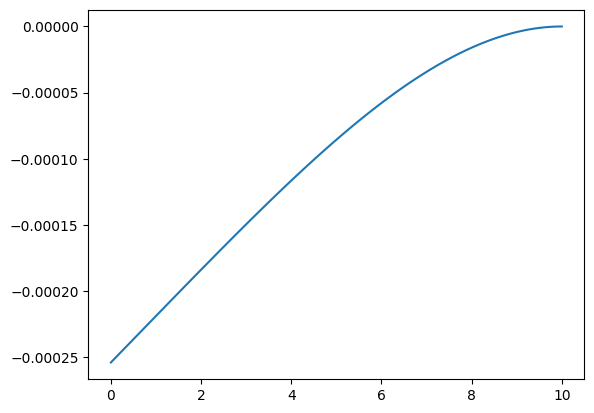

In [39]:
uFun   = lambdify(x, uSub)
varx   = np.linspace(0., valL, 100)
plt.plot(varx, uFun(varx))

#### Plot axial stress $\sigma(x,y)$

Considered y at neutral axis $d_\mathrm{na}$.

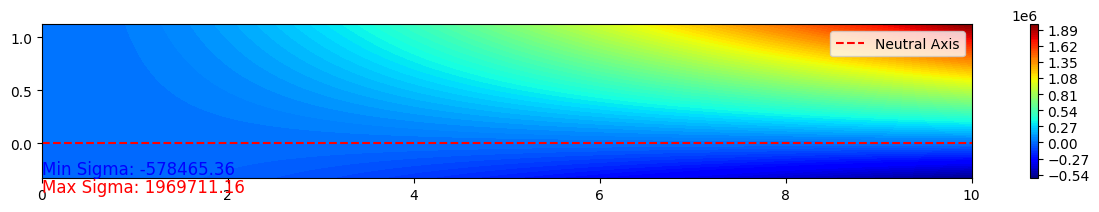

In [40]:
sigmaFun   = lambdify([x,y], sigmaSub)
varx       = np.linspace(0., valL, 100)
vary       = np.linspace(-vald_na, valt_f+valw_w-vald_na, 50)

# Create a grid of x and y values using np.meshgrid
X, Y   = np.meshgrid(varx, vary)

# Evaluate your sigma function on the grid of x and y values
sigmaNum = sigmaFun(X, Y)

fig, ax    = plt.subplots(figsize=(15, 2))
campLabel=plt.contourf(X, Y, sigmaFun(X,Y), levels=100,cmap='jet')

cbar = fig.colorbar(campLabel)

max_sigma = np.max(sigmaNum)
min_sigma = np.min(sigmaNum)

# Give Max and Min Value for Sigma on Plot
plt.text(varx[0], vary[0], f'Max Sigma: {max_sigma:.2f}', color='red', fontsize=12, va='top')
plt.text(varx[0], vary[0], f'Min Sigma: {min_sigma:.2f}', color='blue', fontsize=12, va='bottom')

# Draw a l line at y = 0 and label it as the neutral axis
plt.axhline(y=0, color='red', linestyle='--', label='Neutral Axis')

# Show the plot
plt.legend()
plt.show()

#### Optimization
subbing necessary values in equation

In [41]:
# Defining parameters
u_lim       = -valL/100 # m - limit of displacement (do not exceed)
sigma_yield = -200e6    # Pa - yield stress (do not exceed)

valt_f_min  = 0.001     # m - minimum dimension of t_f
valt_w_min  = 0.001     # m - minimum dimension of t_w

valt_f_max  = 0.05      # m - maximum dimension of t_f
valt_w_max  = 0.025     # m - maximum dimension of t_w

valrho      = 8900      #density kg/m^3

ASub      = A_I.subs(    [(w_f, valw_f),(w_w, valw_w)])

uSub      = usol.subs( [(x,0),\
                        (w_f, valw_f),(w_w, valw_w),\
                        (E, valE),(L, valL),\
                        (p_max, valp_max)])

sigmaSub  = sigma.subs( [(x,valL),(y,-d_na_I),\
                        (w_f, valw_f),(w_w, valw_w),\
                        (E, valE),(L, valL),\
                        (p_max, valp_max)])

AFun      = lambdify([t_f,t_w], ASub)
uFun      = lambdify([t_f,t_w], uSub)
sigmaFun  = lambdify([t_f,t_w], sigmaSub)

#### Contour plot



\begin{equation}
\begin{aligned}
\min_{t_\mathrm{f},t_\mathrm{w}} \quad & \mathrm{A L \rho}\\
\textrm{s.t.} \quad & \sigma_\mathrm{max} < \sigma_\mathrm{yield}\\
& u_\mathrm{max} < u_\mathrm{limit}\\
& t_\mathrm{f, min}<t_\mathrm{f}<t_\mathrm{f, max}\\
& t_\mathrm{w, min}<t_\mathrm{w}<t_\mathrm{w, max}
\end{aligned}
\end{equation}




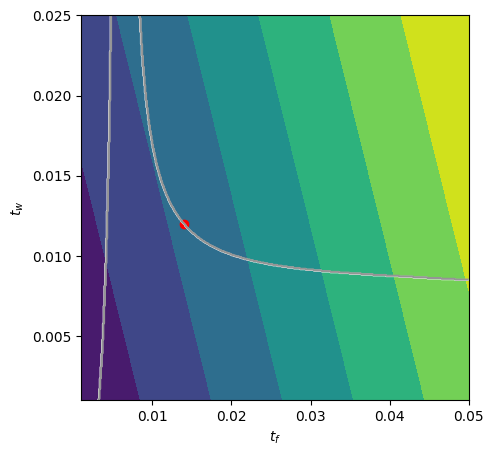

In [44]:
vart_f   = np.linspace(valt_f_min, valt_f_max, 500)
vart_w   = np.linspace(valt_w_min, valt_w_max, 500)

mgt_f, mgt_w = np.meshgrid(vart_f, vart_w)

ANum     = AFun(mgt_f, mgt_w)*valrho*valL
uNum     = uFun(mgt_f, mgt_w)
sigmaNum = sigmaFun(mgt_f, mgt_w)

fig, ax = plt.subplots(figsize=(5, 5))
plt.contourf(mgt_f, mgt_w, ANum, cmap='viridis')
plt.contour(mgt_f, mgt_w, np.sign(uNum - u_lim), 1, cmap="Greys")
plt.contour(mgt_f, mgt_w, np.sign(sigmaNum - sigma_yield), 1, cmap='Greys')

plt.scatter(0.0140,0.0120,color='r') # My selection point
plt.xlabel(r'$t_f$')
plt.ylabel(r'$t_w$')

plt.xlim([valt_f_min,valt_f_max])
plt.ylim([valt_w_min,valt_w_max])

plt.show()